# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **Data Loading**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Buat URL unduhan langsung
path = "data/supervised_4_diabetes_prediction_dataset.csv"
# path = "/content/drive/MyDrive/Semester 4/Data Science/diabetes_prediction_dataset.csv"

# Baca file CSV dari URL
data = pd.read_csv(path)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Cek missing values
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [6]:
# Hapus kolom Variabel, Kolom (Opsional jika terdapat kolom yang tidak di perlukan)
# data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
# data.head()

In [7]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# **EDA**

Disini bebas, mau visualisasikan apa saja. Namun di sarankan untuk visualisasi data yang memiliki korelasi atau yang penting-penting saja.

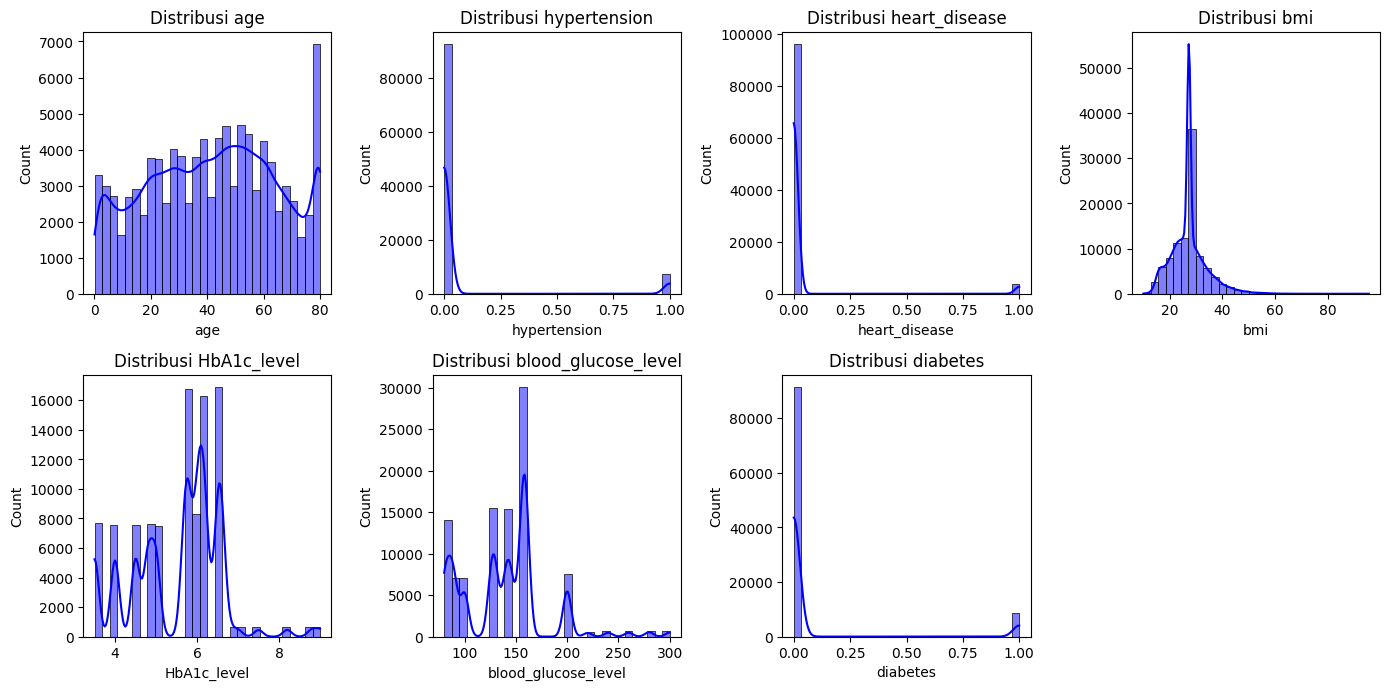

In [8]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

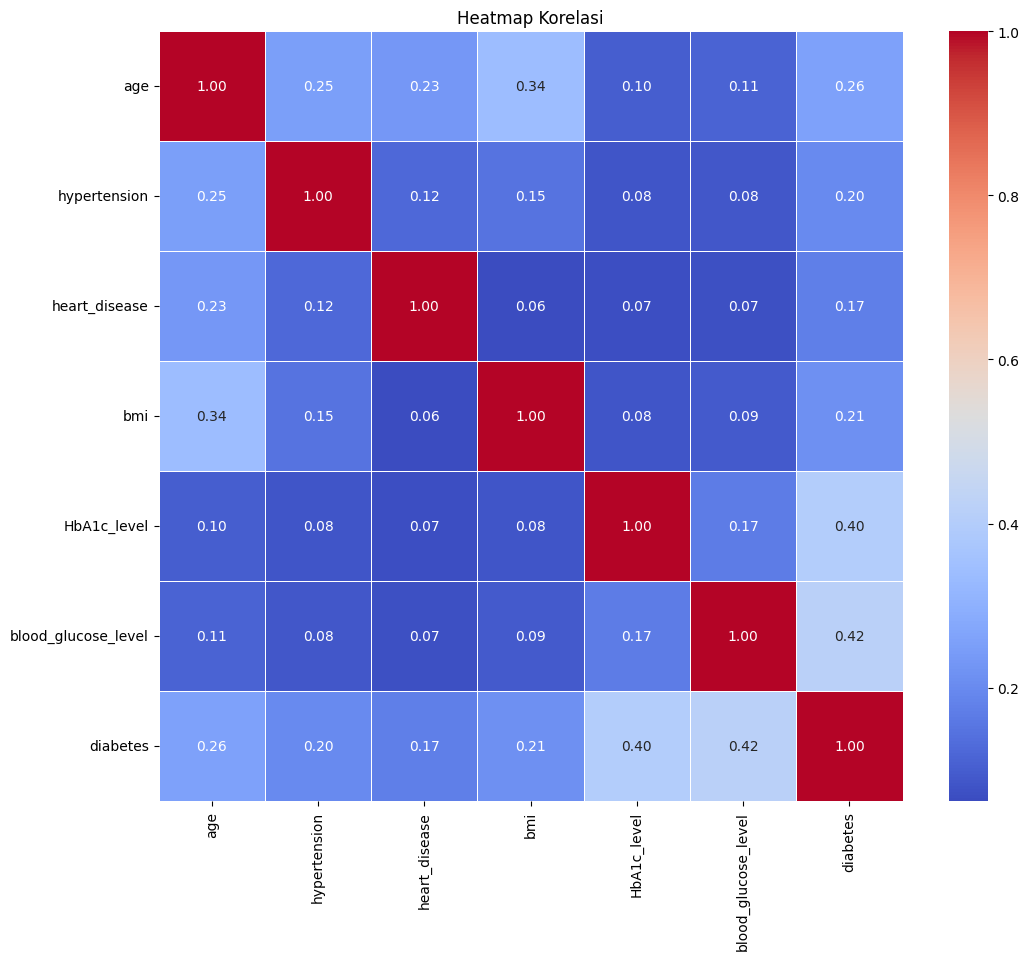

In [9]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

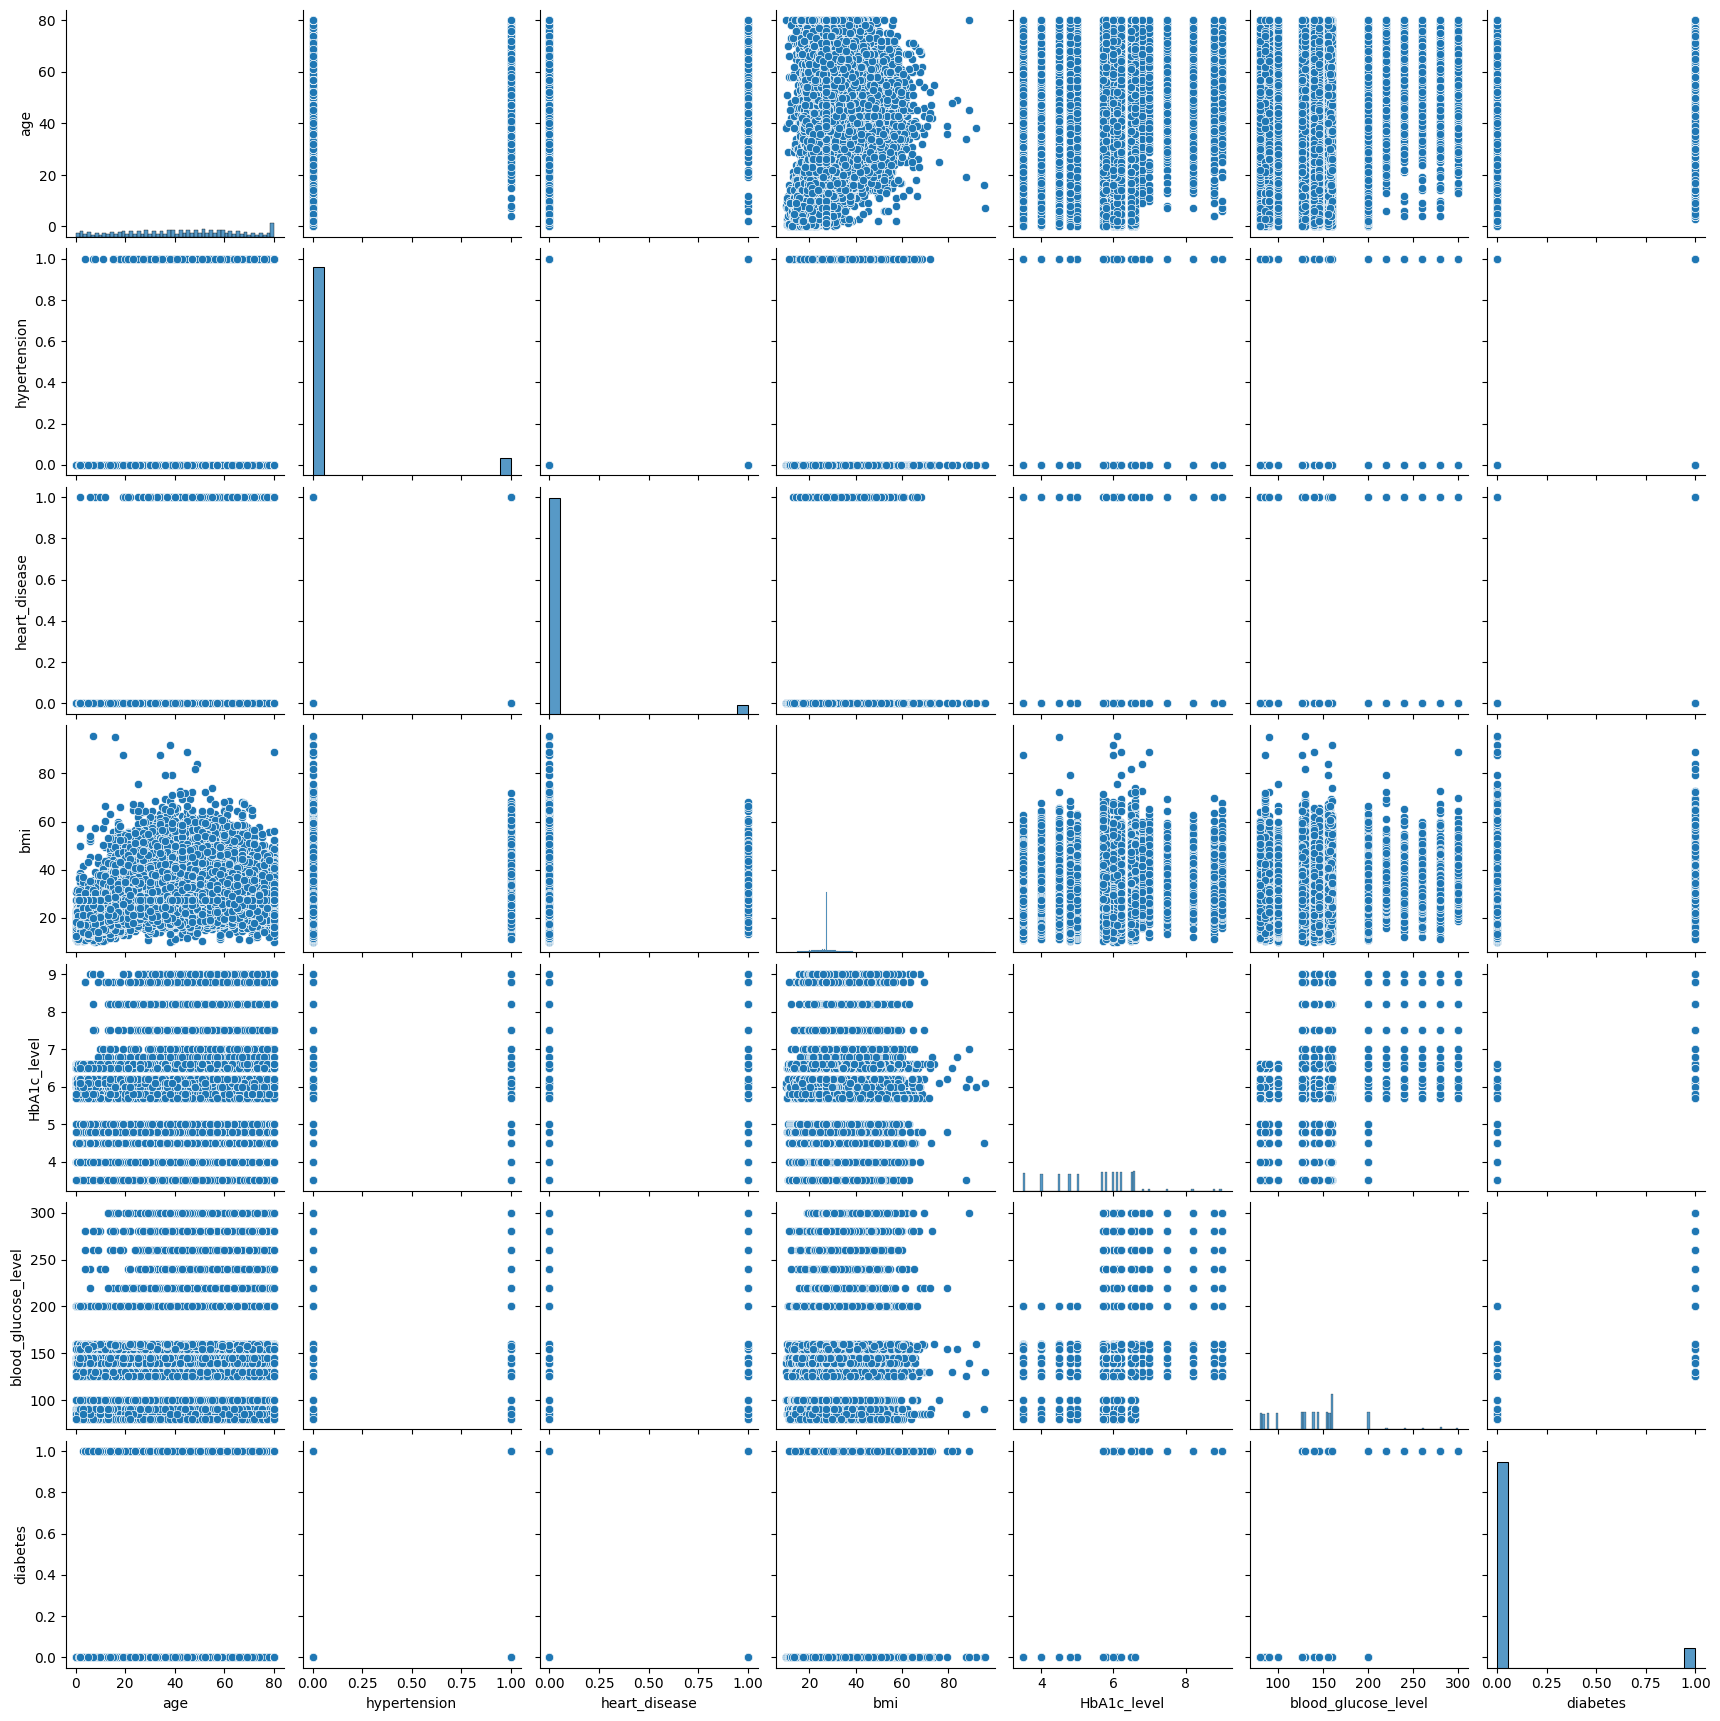

In [10]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

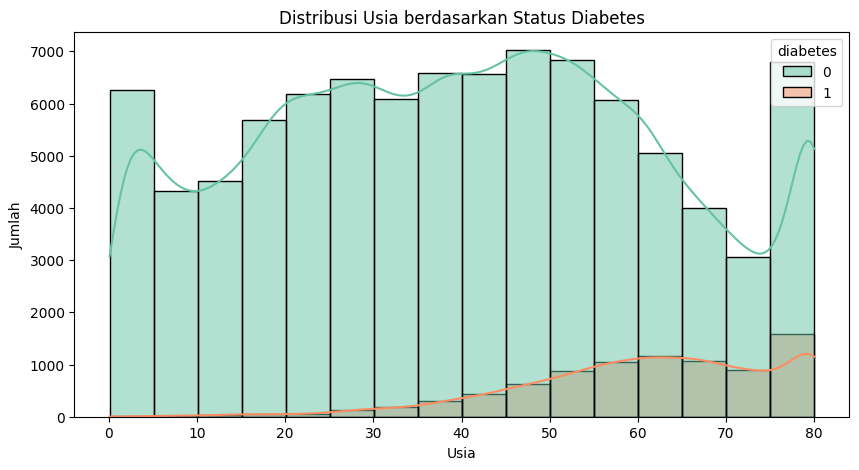

In [11]:
# age
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='age', hue='diabetes', bins=16, kde=True, palette='Set2')
plt.title('Distribusi Usia berdasarkan Status Diabetes')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

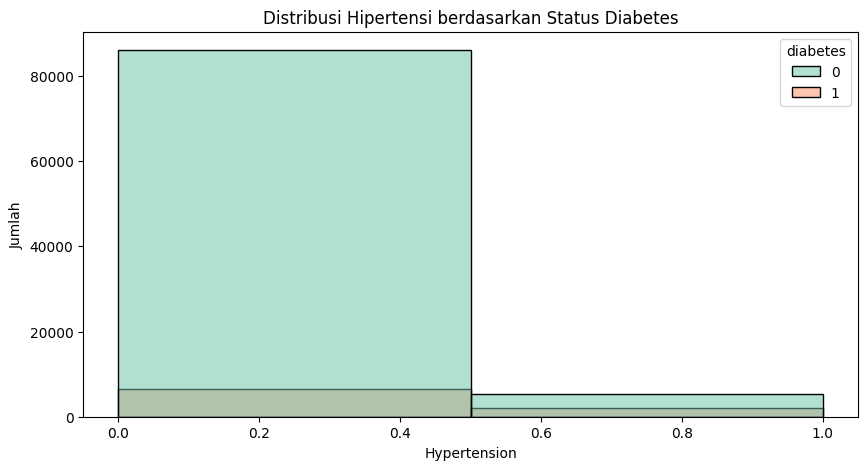

In [12]:
# hypertension
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='hypertension', hue='diabetes', bins=2, kde=False, palette='Set2')
plt.title('Distribusi Hipertensi berdasarkan Status Diabetes')
plt.xlabel('Hypertension')
plt.ylabel('Jumlah')
plt.show()

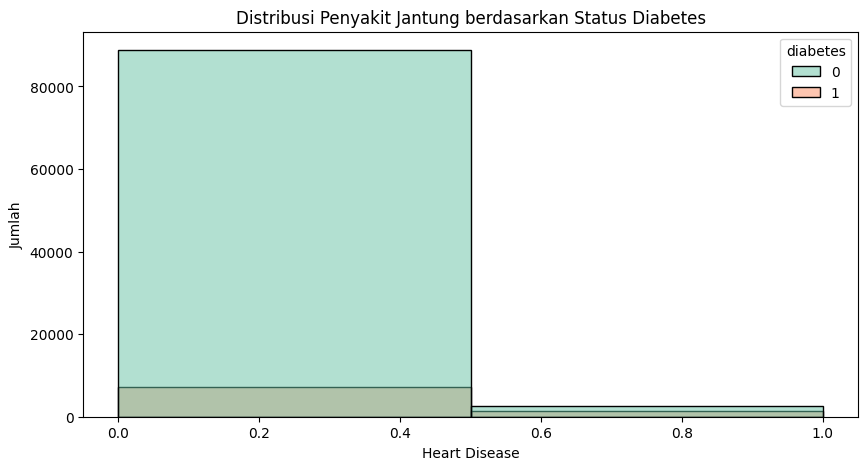

In [13]:
# heart_disease
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='heart_disease', hue='diabetes', bins=2, kde=False, palette='Set2')
plt.title('Distribusi Penyakit Jantung berdasarkan Status Diabetes')
plt.xlabel('Heart Disease')
plt.ylabel('Jumlah')
plt.show()

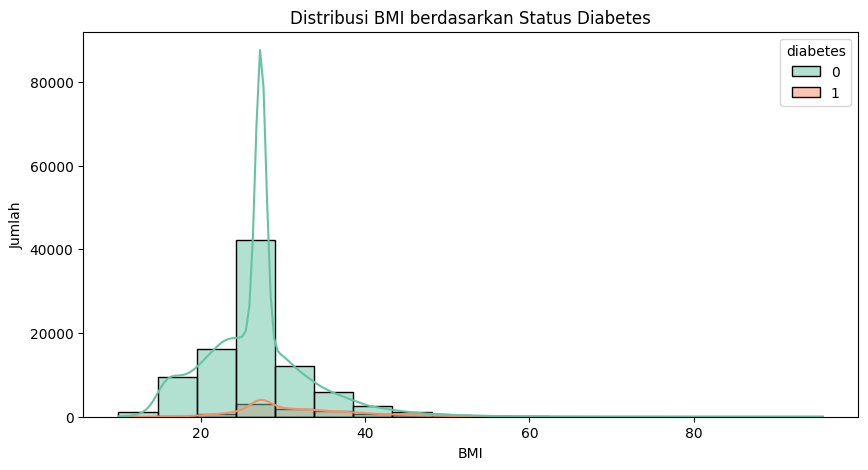

In [14]:
# bmi
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='bmi', hue='diabetes', bins=18, kde=True, palette='Set2')
plt.title('Distribusi BMI berdasarkan Status Diabetes')
plt.xlabel('BMI')
plt.ylabel('Jumlah')
plt.show()

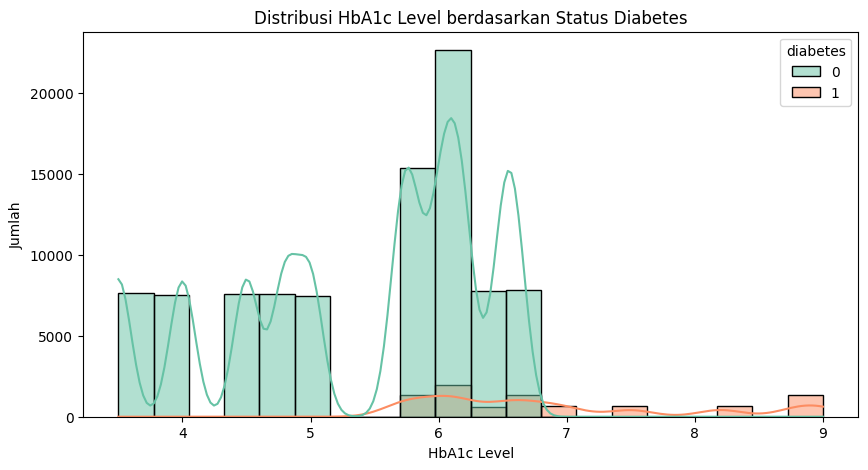

In [15]:
# HbA1c_level
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='HbA1c_level', hue='diabetes', bins=20, kde=True, palette='Set2')
plt.title('Distribusi HbA1c Level berdasarkan Status Diabetes')
plt.xlabel('HbA1c Level')
plt.ylabel('Jumlah')
plt.show()

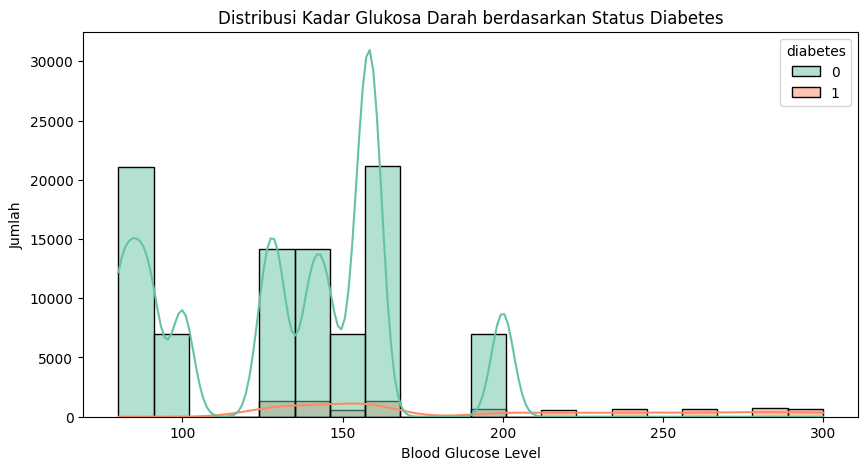

In [16]:
# blood_glucose_level
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='blood_glucose_level', hue='diabetes', bins=20, kde=True, palette='Set2')
plt.title('Distribusi Kadar Glukosa Darah berdasarkan Status Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Jumlah')
plt.show()

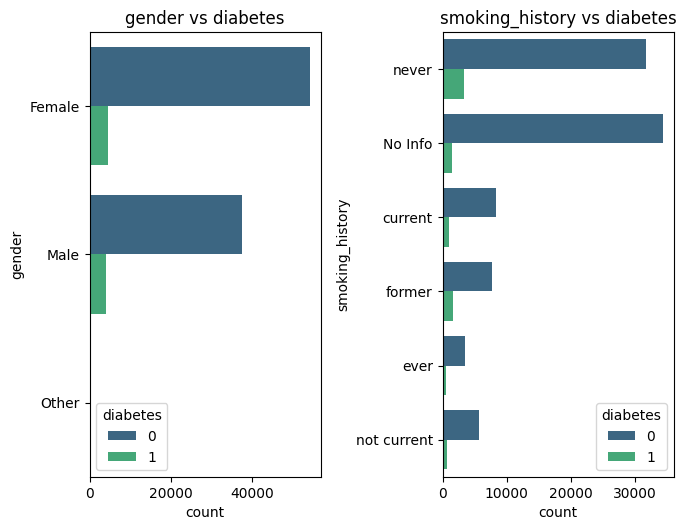

In [17]:
cat_features = data.select_dtypes(include=['object'])
# Fitur kategorikal vs Target
plt.figure(figsize=(14, 10))
for i, column in enumerate(cat_features.columns, 1):
    if column != 'diabetes':
        plt.subplot(2, 4, i)
        sns.countplot(y=column, hue='diabetes', data=data, palette='viridis')
        plt.title(f'{column} vs diabetes')

plt.tight_layout()
plt.show()

# **Label Encoder**

In [18]:
data_label_encoder = data.copy()
data_label_encoder.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [19]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['gender', 'smoking_history']

# Encode kolom kategorikal
for column in categorical_columns:
    data_label_encoder[column] = label_encoder.fit_transform(data_label_encoder[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
data_label_encoder.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [20]:
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Buat instance MinMaxScaler
scaler = MinMaxScaler()

data_label_encoder[numeric_columns] = scaler.fit_transform(data_label_encoder[numeric_columns])
data_label_encoder[numeric_columns].head()

,age,bmi,HbA1c_level,blood_glucose_level
0,1.000000,0.177171,0.563636,0.272727
1,0.674675,0.202031,0.563636,0.000000
2,0.349349,0.202031,0.400000,0.354545
3,0.449449,0.156863,0.272727,0.340909
4,0.949950,0.118231,0.236364,0.340909


In [21]:
data_label_encoder.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.000000,0,1,4,0.177171,0.563636,0.272727,0
1,0,0.674675,0,0,0,0.202031,0.563636,0.000000,0
2,1,0.349349,0,0,4,0.202031,0.400000,0.354545,0
3,0,0.449449,0,0,1,0.156863,0.272727,0.340909,0
4,1,0.949950,1,1,1,0.118231,0.236364,0.340909,0


In [22]:
data_label_encoder.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [23]:
data_label_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  float64
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 6.9 MB


# **Data Splitting**

In [24]:
independent = data_label_encoder.drop(columns=['diabetes'])
print("Independent Variables (X):")
print(independent.columns.tolist())

dependent = data_label_encoder['diabetes']
print("\nDependent Variable (y):")
print(dependent.name)


Independent Variables (X):
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

Dependent Variable (y):
diabetes


In [25]:
# Pisahkan fitur (X) dan target (y)
X = data_label_encoder.drop(columns=['diabetes'])
y = data_label_encoder['diabetes']

# Split data_label_encoder menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(80000, 8), y_train=(80000,)
Test set shape: X_test=(20000, 8), y_test=(20000,)


# **Pemilihan Jumlah Tetangga (K)**

In [26]:
scores = []

print("Hasil Cross-Validation untuk setiap nilai K:")
print("-" * 40)

for k in range(1, 14):
    model = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski')
    score = cross_val_score(model, X_train, y_train, cv=5).mean()
    scores.append((k, score))
    print(f"K = {k:<2} | Akurasi rata-rata = {score:.4f}")

# Ambil K terbaik
best_k = max(scores, key=lambda x: x[1])[0]
best_score = max(scores, key=lambda x: x[1])[1]

print("\n" + "=" * 40)
print(f"K terbaik adalah {best_k} dengan akurasi rata-rata {best_score:.4f}")

Hasil Cross-Validation untuk setiap nilai K:
----------------------------------------
K = 1  | Akurasi rata-rata = 0.9495
K = 2  | Akurasi rata-rata = 0.9500
K = 3  | Akurasi rata-rata = 0.9570
K = 4  | Akurasi rata-rata = 0.9587
K = 5  | Akurasi rata-rata = 0.9595
K = 6  | Akurasi rata-rata = 0.9606
K = 7  | Akurasi rata-rata = 0.9610
K = 8  | Akurasi rata-rata = 0.9610
K = 9  | Akurasi rata-rata = 0.9607
K = 10 | Akurasi rata-rata = 0.9609
K = 11 | Akurasi rata-rata = 0.9607
K = 12 | Akurasi rata-rata = 0.9609
K = 13 | Akurasi rata-rata = 0.9609

K terbaik adalah 7 dengan akurasi rata-rata 0.9610


# **Model Deployment**

In [27]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski')
knn.fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


# **Model Evaluation**

In [28]:
# Prediksi pada data latih dan data uji
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Evaluasi Akurasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Akurasi Training:", f"{train_acc:.4f}")
print("Akurasi Test    :", f"{test_acc:.4f}")

Akurasi Training: 0.9992
Akurasi Test    : 0.9604


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.88      0.62      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000


Confusion Matrix (Test Set):


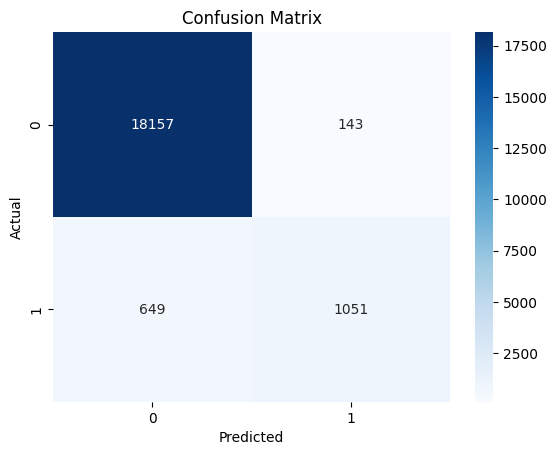

In [29]:
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test Set):")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

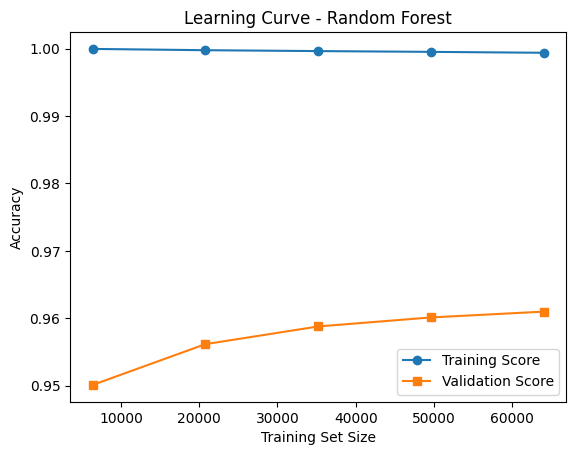

In [30]:
# Meminta learning curve untuk KNN
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5, scoring='accuracy')

# Rata-rata hasil cross-validation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Visualisasi Learning Curve
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Score", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve - Random Forest")
plt.show()

# **Prediksi Data Baru**

In [31]:
# Contoh data pasien baru
new_data = {
    'gender': 'Male',
    'age': 55,
    'hypertension': 1,
    'heart_disease': 1,
    'smoking_history': 'current',
    'bmi': 28.7,
    'HbA1c_level': 8.2,
    'blood_glucose_level': 270
}

In [32]:
# Ubah jadi DataFrame
new_df = pd.DataFrame([new_data])

# Label encoding
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    le.fit(data[col])  # Gunakan data training
    new_df[col] = le.transform(new_df[col])

# Normalisasi fitur numerik
new_df[numeric_columns] = scaler.transform(new_df[numeric_columns])

In [33]:
new_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1,0.687187,1,1,1,0.218137,0.854545,0.863636


In [34]:
# Prediksi
prediction = knn.predict(new_df)
print("Hasil Prediksi:", "Diabetes" if prediction[0] == 1 else "Tidak Diabetes")

Hasil Prediksi: Diabetes
